In [3]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cmocean

%matplotlib inline

In [33]:
bathy = xr.open_dataset('/data/bmoorema/MEOPAR/grid/bathymetry_201702.nc')
mask = xr.open_dataset('/data/bmoorema/MEOPAR/grid/mesh_mask201702.nc')
traj = xr.open_dataset('/data/bmoorema/MEOPAR/ariane/runsets/test/ariane_trajectories_qualitative.nc')

(48.8, 49.6)

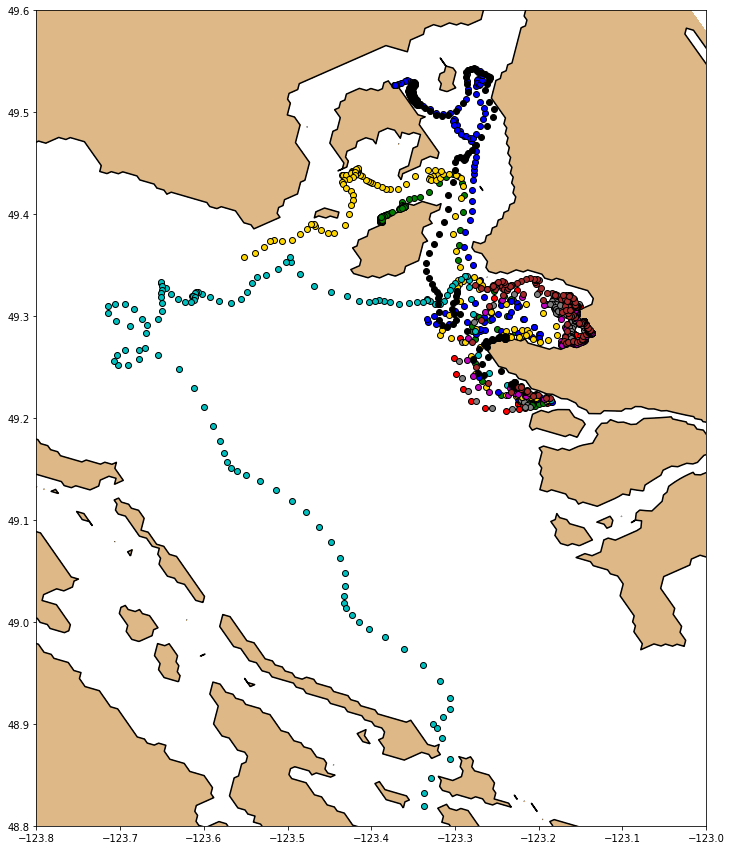

In [56]:
fig, ax = plt.subplots(1, 1, figsize=(12, 15))
ax.contourf(bathy.nav_lon, bathy.nav_lat, mask.tmask[0, 0, ...], levels=[-0.01, 0.01], colors='Burlywood')
ax.contour(bathy.nav_lon, bathy.nav_lat, mask.tmask[0, 0, ...], levels=[-0.01, 0.01], colors='k')
palette = ['r', 'g', 'b', 'gray', 'gold', 'c', 'm', 'k', 'brown']
for drifter, color in zip(range(9), palette):
    ax.plot(traj.traj_lon[:, drifter], traj.traj_lat[:, drifter], 'ko', markerfacecolor=color)
ax.set_xlim([-123.8, -123])
ax.set_ylim([48.8, 49.6])

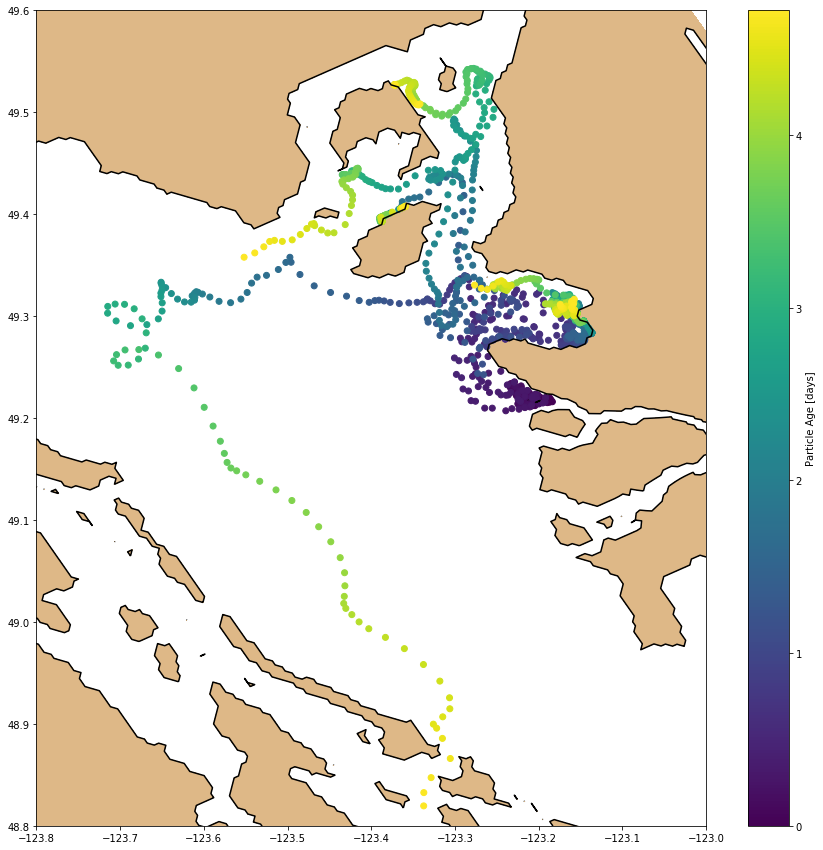

In [70]:
fig, ax = plt.subplots(1, 1, figsize=(15,15))
ax.contourf(bathy.nav_lon, bathy.nav_lat, mask.tmask[0, 0, ...], levels=[-0.01, 0.01], colors='Burlywood')
ax.contour(bathy.nav_lon, bathy.nav_lat, mask.tmask[0, 0, ...], levels=[-0.01, 0.01], colors='k')
c = ax.scatter(traj.traj_lon, traj.traj_lat, c=traj.traj_time*5)
ax.set_xlim([-123.8, -123])
ax.set_ylim([48.8, 49.6])
fig.colorbar(c, label='Particle Age [days]')